# 03 无监督学习与预处理

## 1 无监督学习的类型

在无监督学习中，学习算法只有输入类型，并需要从这些数据中提取知识。

这一章节将研究两种类型的无监督学习：数据集变换与聚类。

数据集的 **无监督变换（unsupervised transformation）** 是创建数据新的表示的算法，与数据的原始表示相比，新的表示可能更容易被人或机器学习算法所理解。

无监督变换的常见应用：

- 降维（dimensionality reduction）：它接受包含许多特征的高维数据，并找到表示该数据的一种新方法，用较少的特征亏可以概括其重要特性。机器学习中常为了可视化而将数据降维为二维。
- 找到“构成”数据的各个组成部分：比如对文本文档集合进行主题提取，具体而言可以用于追踪社交媒体上的话题讨论。

**聚类算法（clustering algorithm）** 将数据划分为不同的组，每组包含相似的物项。

## 2 无监督学习的挑战

无监督学习的一个主要挑战是评估算法是否学到了有用的东西。由于输入数据不包含任何标签信息，我们不知道算法正确的输出是什么，一次很难判断一个模型是否表现很好。通常来说，评估无监督学习算法的唯一方法是人工检验。

无监督学习算法通常可用于探索性的目的吗，其另一个重要应用就是作为监督学习算法的预处理步骤。学习数据的一种新表示，又是可以提高监督算法的精度或减小内存和时间开销。因此，下面先介绍几种简单常用的预处理方法。

## 3 预处理与缩放

一些算法（如神经网络与 SVM）对数据缩放非常敏感。因此，在开始训练模型之前，通常需要对特征进行调节，使数据表示更符合这些算法。通常是对数据简单地按特征进行缩放或移动。

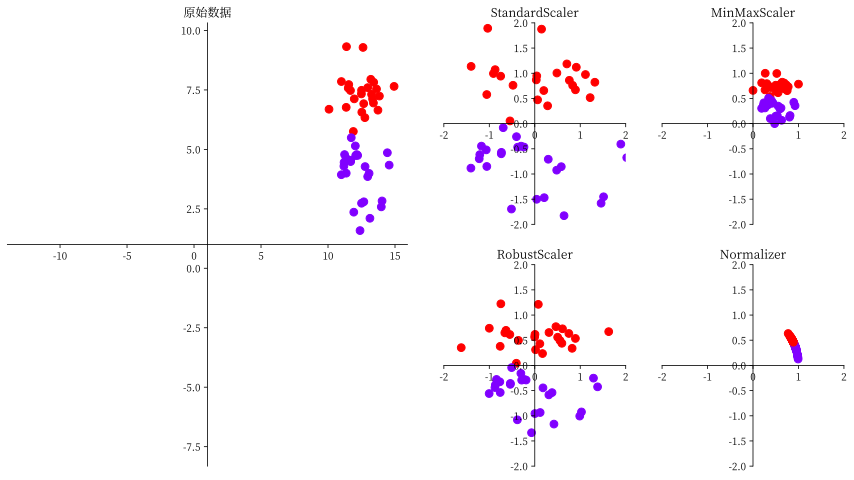

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

plt.rcParams["font.sans-serif"] = "Noto Serif SC"
plt.rcParams["axes.unicode_minus"] = False

X, y = make_blobs(n_samples=50, centers=2, random_state=4, cluster_std=1)
X += 3

plt.figure(figsize=(15, 8))
main_ax = plt.subplot2grid((2, 4), (0, 0), rowspan=2, colspan=2)

main_ax.scatter(X[:, 0], X[:, 1], c=y, cmap='rainbow', s=60)
maxx = np.abs(X[:, 0]).max()
maxy = np.abs(X[:, 1]).max()

main_ax.set_xlim(-maxx + 1, maxx + 1)
main_ax.set_ylim(-maxy + 1, maxy + 1)
main_ax.set_title("原始数据")
other_axes = [plt.subplot2grid((2, 4), (i, j))
              for j in range(2, 4) for i in range(2)]

for ax, scaler in zip(
        other_axes,
        [StandardScaler(), RobustScaler(),
         MinMaxScaler(), Normalizer(norm='l2')]
):
    X_ = scaler.fit_transform(X)
    ax.scatter(X_[:, 0], X_[:, 1], c=y, cmap='rainbow', s=60)
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_title(type(scaler).__name__)

other_axes.append(main_ax)

for ax in other_axes:
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
plt.show()

### 3.1 不同类型的预处理

上面的图模拟的是一个包含两个特征的二分类数据集，第一个特征位于 10 到 15 之间，第二个特征位于 1 到 9之间。上面展示了 4 中数据变换方式：

- `StandardScaler`：确保每个特征的均值为 0，方差为 1，是所有特征位于同一量级。它通过移除平均值然后缩放到单位方差来标准化特征，但不能保证特征的最小值和最大值。
- `RobustScaler`：工作原理类似于 `StandardScaler`，确保每个特征的统计属性位于同一范围。但是使用中位数和四分位数而不是平均值和方差。这种缩放方法对异常值更具有鲁棒性。
- `MinMaxScaler`：将特征缩放到给定的最小值和最大值之间，通常是 0 到 1 之间。
- `Normalizer`：通过对每个数据点进行缩放，使得特征向量的欧几里得长度为 1。如果只有数据的方向（角度）是重要的，而特征向量的程度无关紧要，通常使用这种归一化。在处理稀疏矩阵时非常有用。

### 3.2 应用数据变化

以乳腺癌数据集为例，使用 `MinMaxScaler` 来预处理该数据集，并用核 SVM 来训练。

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=1
)
scaler = MinMaxScaler().fit(X_train)

对缩放器实例化并使用 `fit` 方法拟合后，还需要使用缩放器的 `transform` 方法返回缩放后的数据。在 `scikit-learn` 中，每当模型返回数据的一种新表示时，都可以使用 `transform` 方法。

In [3]:
X_train_scaled = scaler.transform(X_train)
print("训练集每个特征的最小值：\n{}".format(X_train_scaled.min(axis=0)))
print("训练集每个特征的最大值：\n{}".format(X_train_scaled.max(axis=0)))

训练集每个特征的最小值：
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
训练集每个特征的最大值：
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [4]:
X_test_scaled = scaler.transform(X_test)
print("测试集每个特征的最小值：\n{}".format(X_test_scaled.min(axis=0)))
print("测试集每个特征的最大值：\n{}".format(X_test_scaled.max(axis=0)))

测试集每个特征的最小值：
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
测试集每个特征的最大值：
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


我们发现，对测试集缩放后的最大值核最小是不是 1 和 0。这是因为 `MinMaxScaler`（以及其他所有缩放器）总是对训练集和测试集应用完全相同的变换，而缩放器是在训练集上拟合的，所以它将训练集的最小值转换为 0，最大值转换为 1。然后，它使用相同的缩放参数来转换测试集，这样测试集就不会保留原始数据的分布。

### 3.3 对训练集和测试集进行相同的缩放
为了让监督模型能够在测试集上运行，对训练集和测试集应用完全相同的变换时很重要的。如果我们使用测试集的最小值和范围来进行缩放，下面的例子展示了会发生什么。

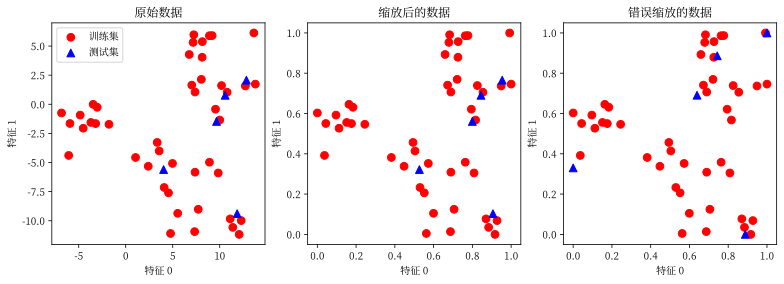

In [5]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)
X_train, X_test = train_test_split(X, random_state=5, test_size=.1)
fig, axes = plt.subplots(1, 3, figsize=(13, 4))
axes[0].scatter(
    X_train[:, 0], X_train[:, 1],
    c='red', label="训练集", s=60
)
axes[0].scatter(
    X_test[:, 0], X_test[:, 1], marker='^',
    c='blue', label="测试集", s=60
)
axes[0].legend(loc='upper left')
axes[0].set_title("原始数据")

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
axes[1].scatter(
    X_train_scaled[:, 0], X_train_scaled[:, 1],
    c='red', label="训练集", s=60
)
axes[1].scatter(
    X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
    c='blue', label="测试集", s=60
)
axes[1].set_title("缩放后的数据")

test_scaler = MinMaxScaler().fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)
axes[2].scatter(
    X_train_scaled[:, 0], X_train_scaled[:, 1],
    c='red', label="训练集", s=60
)
axes[2].scatter(
    X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1], marker='^',
    c='blue', label="测试集", s=60
)
axes[2].set_title("错误缩放的数据")

for ax in axes:
    ax.set_xlabel("特征 0")
    ax.set_ylabel("特征 1")
plt.show()

前两张图中，训练集和测试集数据点的相对位置是一致的，不同的只是坐标轴刻度。而第三张图完全改变了数据点之间的相对位置，这显然不是我们想要的。

### 3.4 预处理对监督学习的作用

现在回到乳腺癌数据集，观察使用 `MinMaxScaler` 对学习 SVC 的作用。为了对比，我们同时在原始数据上拟合 SVC。

In [6]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("测试集得分：{}".format(svm.score(X_test, y_test)))

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
svm.fit(X_train_scaled, y_train)
print("缩放后的测试集得分：{}".format(svm.score(X_test_scaled, y_test)))

测试集得分：0.9440559440559441
缩放后的测试集得分：0.965034965034965


可以看到，使用数据缩放的效果很显著。下面看看另外两个缩放器的效果。

In [7]:
from sklearn.preprocessing import StandardScaler, RobustScaler

for scaler in [StandardScaler(), RobustScaler()]:
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    svm.fit(X_train_scaled, y_train)
    print("{} 缩放后的测试集得分：{}".format(
        scaler.__class__.__name__, svm.score(X_test_scaled, y_test)
    ))

StandardScaler 缩放后的测试集得分：0.958041958041958
RobustScaler 缩放后的测试集得分：0.951048951048951


## 4. 降维、特征提取和流形学习

前面讨论过，利用无监督学习决心给数据变换的目的主要是可视化、压缩数据，以及寻找信息量更大的数据表示以用于进一步的处理。

为了实现这些目的，最简单也是最常用的一种方法是 **主成分分析（principal component analysis，PCA）**，此外还有两种算法：**非矩阵分解（NMF）** 和 **t-SNE**。前者通常用于特征提取，后者通常用于二维散点图的可视化。

### 4.1 主成分分析（PCA）

**主成分分析（principal component analysis，PCA）** 是一种旋转数据集的方法，旋转后的特征在统计学上不相关。在做完这种旋转后，通常根据特征对解释数据的重要性来选择它的一个子集。这种变换允许我们去掉数据中的相关性，从而找到数据中最主要的成分。PCA 的主要优点是，它是一种完全无监督的算法，不依赖于输出结果。这一点与前面介绍的无监督学习算法不同，它们都是为了获得与输出相关的数据表示。

下面的例子展示了 PCA 对二维数据集的作用。

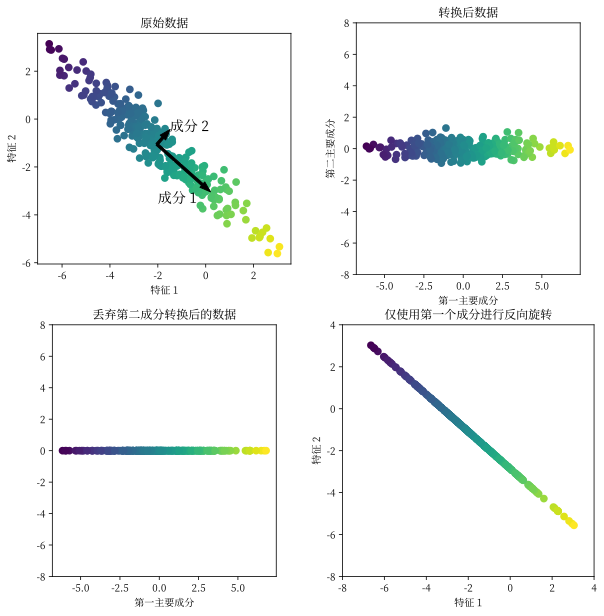

In [19]:
from sklearn.decomposition import PCA

rnd = np.random.RandomState(5)
X_ = rnd.normal(size=(300, 2))
X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

pca = PCA()
pca.fit(X_blob)
X_pca = pca.transform(X_blob)

S = X_pca.std(axis=0)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes = axes.ravel()

axes[0].set_title("原始数据")
axes[0].scatter(
    X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0],
    linewidths=0, s=60, cmap='viridis'
)
axes[0].set_xlabel("特征 1")
axes[0].set_ylabel("特征 2")
axes[0].arrow(
    pca.mean_[0], pca.mean_[1], S[0] * pca.components_[0, 0],
    S[0] * pca.components_[0, 1], width=.1, head_width=.3, color='k'
)
axes[0].arrow(
    pca.mean_[0], pca.mean_[1], S[1] * pca.components_[1, 0],
    S[1] * pca.components_[1, 1], width=.1, head_width=.3, color='k'
)
axes[0].text(-1.5, -.5, "成分 2", size=14)
axes[0].text(-2, -3.5
             , "成分 1", size=14)
axes[0].set_aspect('equal')

axes[1].set_title("转换后数据")
axes[1].scatter(
    X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0],
    linewidths=0, s=60, cmap='viridis'
)
axes[1].set_xlabel("第一主要成分")
axes[1].set_ylabel("第二主要成分")
axes[1].set_aspect('equal')
axes[1].set_ylim(-8, 8)

pca = PCA(n_components=1)
pca.fit(X_blob)
X_inverse = pca.inverse_transform(pca.transform(X_blob))

axes[2].set_title("丢弃第二成分转换后的数据")
axes[2].scatter(
    X_pca[:, 0], np.zeros(X_pca.shape[0]), c=X_pca[:, 0],
    linewidths=0, s=60, cmap='viridis'
)
axes[2].set_xlabel("第一主要成分")
axes[2].set_aspect('equal')
axes[2].set_ylim(-8, 8)

axes[3].set_title("仅使用第一个成分进行反向旋转")
axes[3].scatter(
    X_inverse[:, 0], X_inverse[:, 1], c=X_pca[:, 0],
    linewidths=0, s=60, cmap='viridis'
)
axes[3].set_xlabel("特征 1")
axes[3].set_ylabel("特征 2")
axes[3].set_aspect('equal')
axes[3].set_xlim(-8, 4)
axes[3].set_ylim(-8, 4)
plt.show()